# **Practical: The Adult Example**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
df = pd.read_csv("/content/drive/My Drive/adult.csv")
df.shape

(32560, 15)

In [4]:
df.head

<bound method NDFrame.head of        39          State-gov   77516  ...  40   United-States   <=50K
0      50   Self-emp-not-inc   83311  ...  13   United-States   <=50K
1      38            Private  215646  ...  40   United-States   <=50K
2      53            Private  234721  ...  40   United-States   <=50K
3      28            Private  338409  ...  40            Cuba   <=50K
4      37            Private  284582  ...  40   United-States   <=50K
...    ..                ...     ...  ...  ..             ...     ...
32555  27            Private  257302  ...  38   United-States   <=50K
32556  40            Private  154374  ...  40   United-States    >50K
32557  58            Private  151910  ...  40   United-States   <=50K
32558  22            Private  201490  ...  20   United-States   <=50K
32559  52       Self-emp-inc  287927  ...  40   United-States    >50K

[32560 rows x 15 columns]>

In [5]:
df.tail

<bound method NDFrame.tail of        39          State-gov   77516  ...  40   United-States   <=50K
0      50   Self-emp-not-inc   83311  ...  13   United-States   <=50K
1      38            Private  215646  ...  40   United-States   <=50K
2      53            Private  234721  ...  40   United-States   <=50K
3      28            Private  338409  ...  40            Cuba   <=50K
4      37            Private  284582  ...  40   United-States   <=50K
...    ..                ...     ...  ...  ..             ...     ...
32555  27            Private  257302  ...  38   United-States   <=50K
32556  40            Private  154374  ...  40   United-States    >50K
32557  58            Private  151910  ...  40   United-States   <=50K
32558  22            Private  201490  ...  20   United-States   <=50K
32559  52       Self-emp-inc  287927  ...  40   United-States    >50K

[32560 rows x 15 columns]>

In [6]:
df

,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [7]:
df.columns

Index(['39', ' State-gov', ' 77516', ' Bachelors', ' 13', ' Never-married',
       ' Adm-clerical', ' Not-in-family', ' White', ' Male', ' 2174', ' 0',
       ' 40', ' United-States', ' <=50K'],
      dtype='object')

In [8]:
# adding column name to the respective columns
df.columns = ['age', 'workclass', 'fnlwgt', 'education', 'educationNum', 'maritalStatus', 'occupation', 'relationship', 'race', 'sex', 'capitalGain', 'capitalLoss', 'hoursPerWeek', 'nativeCountry', 'salary'] 
  
# displaying the DataFrame
forPlotting = df
df

,age,workclass,fnlwgt,education,educationNum,maritalStatus,occupation,relationship,race,sex,capitalGain,capitalLoss,hoursPerWeek,nativeCountry,salary
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [9]:
df.isnull().values.any()

False

In [10]:
df.isnull().sum().sum()

0

In [11]:
df

,age,workclass,fnlwgt,education,educationNum,maritalStatus,occupation,relationship,race,sex,capitalGain,capitalLoss,hoursPerWeek,nativeCountry,salary
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [12]:
df.salary.unique()

array([' <=50K', ' >50K'], dtype=object)

In [13]:
#forFutureUse
saveSalary = df['salary'].to_numpy()
print(saveSalary)

[' <=50K' ' <=50K' ' <=50K' ... ' <=50K' ' <=50K' ' >50K']


In [14]:
#df = df.replace({'salary': {'<=50K':-1 ,'>50K':+1}})

df['salary'] = df['salary'].replace({" <=50K": -1 ," >50K": +1})
df.head()

,age,workclass,fnlwgt,education,educationNum,maritalStatus,occupation,relationship,race,sex,capitalGain,capitalLoss,hoursPerWeek,nativeCountry,salary
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,-1
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,-1
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,-1
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,-1
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,-1


In [15]:
salary = df['salary'].to_numpy()
print(salary)

[-1 -1 -1 ... -1 -1  1]


In [16]:
df = df.drop(columns = ['salary'])

In [17]:
df.head()

,age,workclass,fnlwgt,education,educationNum,maritalStatus,occupation,relationship,race,sex,capitalGain,capitalLoss,hoursPerWeek,nativeCountry
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States


In [18]:
df.describe()

,age,fnlwgt,educationNum,capitalGain,capitalLoss,hoursPerWeek
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469
std,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [19]:
df.capitalGain.value_counts()

0        29849
15024      347
7688       284
7298       246
99999      159
         ...  
4931         1
1455         1
6097         1
22040        1
1111         1
Name: capitalGain, Length: 119, dtype: int64

In [20]:
df.capitalLoss.value_counts()

0       31041
1902      202
1977      168
1887      159
1848       51
        ...  
1411        1
1539        1
2472        1
1944        1
2201        1
Name: capitalLoss, Length: 92, dtype: int64

In [21]:
df = df.drop(columns = ['capitalGain'])
df = df.drop(columns = ['capitalLoss'])
df

,age,workclass,fnlwgt,education,educationNum,maritalStatus,occupation,relationship,race,sex,hoursPerWeek,nativeCountry
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,United-States
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,United-States
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,United-States
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,Cuba
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,40,United-States
...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,38,United-States
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,40,United-States
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,40,United-States
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,20,United-States


In [22]:
df.workclass.unique()

array([' Self-emp-not-inc', ' Private', ' State-gov', ' Federal-gov',
       ' Local-gov', ' ?', ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)

In [23]:
df.education.unique()

array([' Bachelors', ' HS-grad', ' 11th', ' Masters', ' 9th',
       ' Some-college', ' Assoc-acdm', ' Assoc-voc', ' 7th-8th',
       ' Doctorate', ' Prof-school', ' 5th-6th', ' 10th', ' 1st-4th',
       ' Preschool', ' 12th'], dtype=object)

In [24]:
df.maritalStatus.unique()

array([' Married-civ-spouse', ' Divorced', ' Married-spouse-absent',
       ' Never-married', ' Separated', ' Married-AF-spouse', ' Widowed'],
      dtype=object)

In [25]:
df.occupation.unique()

array([' Exec-managerial', ' Handlers-cleaners', ' Prof-specialty',
       ' Other-service', ' Adm-clerical', ' Sales', ' Craft-repair',
       ' Transport-moving', ' Farming-fishing', ' Machine-op-inspct',
       ' Tech-support', ' ?', ' Protective-serv', ' Armed-Forces',
       ' Priv-house-serv'], dtype=object)

In [26]:
df.relationship.unique()

array([' Husband', ' Not-in-family', ' Wife', ' Own-child', ' Unmarried',
       ' Other-relative'], dtype=object)

In [27]:
df.race.unique()

array([' White', ' Black', ' Asian-Pac-Islander', ' Amer-Indian-Eskimo',
       ' Other'], dtype=object)

In [28]:
df.sex.unique()

array([' Male', ' Female'], dtype=object)

In [29]:
df.nativeCountry.unique()

array([' United-States', ' Cuba', ' Jamaica', ' India', ' ?', ' Mexico',
       ' South', ' Puerto-Rico', ' Honduras', ' England', ' Canada',
       ' Germany', ' Iran', ' Philippines', ' Italy', ' Poland',
       ' Columbia', ' Cambodia', ' Thailand', ' Ecuador', ' Laos',
       ' Taiwan', ' Haiti', ' Portugal', ' Dominican-Republic',
       ' El-Salvador', ' France', ' Guatemala', ' China', ' Japan',
       ' Yugoslavia', ' Peru', ' Outlying-US(Guam-USVI-etc)', ' Scotland',
       ' Trinadad&Tobago', ' Greece', ' Nicaragua', ' Vietnam', ' Hong',
       ' Ireland', ' Hungary', ' Holand-Netherlands'], dtype=object)

In [30]:
df.workclass.value_counts(ascending = True)

 Never-worked            7
 Without-pay            14
 Federal-gov           960
 Self-emp-inc         1116
 State-gov            1297
 ?                    1836
 Local-gov            2093
 Self-emp-not-inc     2541
 Private             22696
Name: workclass, dtype: int64

In [31]:
df.education.value_counts(ascending = True)

 Preschool          51
 1st-4th           168
 5th-6th           333
 Doctorate         413
 12th              433
 9th               514
 Prof-school       576
 7th-8th           646
 10th              933
 Assoc-acdm       1067
 11th             1175
 Assoc-voc        1382
 Masters          1723
 Bachelors        5354
 Some-college     7291
 HS-grad         10501
Name: education, dtype: int64

In [32]:
df.maritalStatus.value_counts(ascending = True)

 Married-AF-spouse           23
 Married-spouse-absent      418
 Widowed                    993
 Separated                 1025
 Divorced                  4443
 Never-married            10682
 Married-civ-spouse       14976
Name: maritalStatus, dtype: int64

In [33]:
df.occupation.value_counts(ascending = True)

 Armed-Forces            9
 Priv-house-serv       149
 Protective-serv       649
 Tech-support          928
 Farming-fishing       994
 Handlers-cleaners    1370
 Transport-moving     1597
 ?                    1843
 Machine-op-inspct    2002
 Other-service        3295
 Sales                3650
 Adm-clerical         3769
 Exec-managerial      4066
 Craft-repair         4099
 Prof-specialty       4140
Name: occupation, dtype: int64

In [34]:
df.relationship.value_counts(ascending = True)

 Other-relative      981
 Wife               1568
 Unmarried          3446
 Own-child          5068
 Not-in-family      8304
 Husband           13193
Name: relationship, dtype: int64

In [35]:
df.race.value_counts(ascending = True)

 Other                   271
 Amer-Indian-Eskimo      311
 Asian-Pac-Islander     1039
 Black                  3124
 White                 27815
Name: race, dtype: int64

In [36]:
df.sex.value_counts(ascending = True)

 Female    10771
 Male      21789
Name: sex, dtype: int64

In [37]:
df.nativeCountry.value_counts(ascending = True)

 Holand-Netherlands                1
 Scotland                         12
 Hungary                          13
 Honduras                         13
 Outlying-US(Guam-USVI-etc)       14
 Yugoslavia                       16
 Laos                             18
 Thailand                         18
 Cambodia                         19
 Trinadad&Tobago                  19
 Hong                             20
 Ireland                          24
 Ecuador                          28
 Greece                           29
 France                           29
 Peru                             31
 Nicaragua                        34
 Portugal                         37
 Iran                             43
 Haiti                            44
 Taiwan                           51
 Columbia                         59
 Poland                           60
 Japan                            62
 Guatemala                        64
 Vietnam                          67
 Dominican-Republic               70
 

In [38]:
df

,age,workclass,fnlwgt,education,educationNum,maritalStatus,occupation,relationship,race,sex,hoursPerWeek,nativeCountry
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,United-States
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,United-States
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,United-States
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,Cuba
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,40,United-States
...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,38,United-States
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,40,United-States
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,40,United-States
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,20,United-States


In [39]:
'''
In this dataframe, it contains categorical data which is known as regression classification contains columns
such as education, workclass, sex, race,	relationship, occupation, nativeCountry.
There are some missing values from which we need to find out in further steps for that purpose we need to 
group the columns to form the combination of data and for our understanding as well. 
But still we have undetected errors in dataframe which are easily discoverd by the use of Exploratory Data Analysis (EDA) 
which has two types the first one is graphical and second one which is non-graphical, I tried to apply both so that it will help to understand the dataframe.
'''

'\nIn this dataframe, it contains categorical data which is known as regression classification contains columns\nsuch as education, workclass, sex, race,\trelationship, occupation, nativeCountry.\nThere are some missing values from which we need to find out in further steps for that purpose we need to \ngroup the columns to form the combination of data and for our understanding as well. \nBut still we have undetected errors in dataframe which are easily discoverd by the use of Exploratory Data Analysis (EDA) \nwhich has two types the first one is graphical and second one which is non-graphical, I tried to apply both so that it will help to understand the dataframe.\n'

#**One Hot Encoding** 

In [40]:
df_value = df['age']
OneHotEncoder = pd.get_dummies(data = df_value)
print(OneHotEncoder.head(), '\n')
print(OneHotEncoder.shape)

   17  18  19  20  21  22  23  24  25  ...  81  82  83  84  85  86  87  88  90
0   0   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   0   0   0
1   0   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   0   0   0
2   0   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   0   0   0
3   0   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   0   0   0
4   0   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   0   0   0

[5 rows x 73 columns] 

(32560, 73)


In [41]:
df_value = df['workclass']
OneHotEncoder = pd.get_dummies(data = df_value)
print(OneHotEncoder.head(), '\n')
print(OneHotEncoder.shape)

    ?   Federal-gov   Local-gov  ...   Self-emp-not-inc   State-gov   Without-pay
0   0             0           0  ...                  1           0             0
1   0             0           0  ...                  0           0             0
2   0             0           0  ...                  0           0             0
3   0             0           0  ...                  0           0             0
4   0             0           0  ...                  0           0             0

[5 rows x 9 columns] 

(32560, 9)


In [42]:
df_value = df['fnlwgt']
OneHotEncoder = pd.get_dummies(data = df_value)
print(OneHotEncoder.head(), '\n')
print(OneHotEncoder.shape)

   12285    13769    14878    18827    ...  1268339  1366120  1455435  1484705
0        0        0        0        0  ...        0        0        0        0
1        0        0        0        0  ...        0        0        0        0
2        0        0        0        0  ...        0        0        0        0
3        0        0        0        0  ...        0        0        0        0
4        0        0        0        0  ...        0        0        0        0

[5 rows x 21647 columns] 

(32560, 21647)


In [43]:
df_value = df['education']
OneHotEncoder = pd.get_dummies(data = df_value)
print(OneHotEncoder.head(), '\n')
print(OneHotEncoder.shape)

    10th   11th   12th  ...   Preschool   Prof-school   Some-college
0      0      0      0  ...           0             0              0
1      0      0      0  ...           0             0              0
2      0      1      0  ...           0             0              0
3      0      0      0  ...           0             0              0
4      0      0      0  ...           0             0              0

[5 rows x 16 columns] 

(32560, 16)


In [44]:
df_value = df['educationNum']
OneHotEncoder = pd.get_dummies(data = df_value)
print(OneHotEncoder.head(), '\n')
print(OneHotEncoder.shape)

   1   2   3   4   5   6   7   8   9   10  11  12  13  14  15  16
0   0   0   0   0   0   0   0   0   0   0   0   0   1   0   0   0
1   0   0   0   0   0   0   0   0   1   0   0   0   0   0   0   0
2   0   0   0   0   0   0   1   0   0   0   0   0   0   0   0   0
3   0   0   0   0   0   0   0   0   0   0   0   0   1   0   0   0
4   0   0   0   0   0   0   0   0   0   0   0   0   0   1   0   0 

(32560, 16)


In [45]:
df_value = df['maritalStatus']
OneHotEncoder = pd.get_dummies(data = df_value)
print(OneHotEncoder.head(), '\n')
print(OneHotEncoder.shape)

    Divorced   Married-AF-spouse  ...   Separated   Widowed
0          0                   0  ...           0         0
1          1                   0  ...           0         0
2          0                   0  ...           0         0
3          0                   0  ...           0         0
4          0                   0  ...           0         0

[5 rows x 7 columns] 

(32560, 7)


In [46]:
df_value = df['occupation']
OneHotEncoder = pd.get_dummies(data = df_value)
print(OneHotEncoder.head(), '\n')
print(OneHotEncoder.shape)

    ?   Adm-clerical   Armed-Forces  ...   Sales   Tech-support   Transport-moving
0   0              0              0  ...       0              0                  0
1   0              0              0  ...       0              0                  0
2   0              0              0  ...       0              0                  0
3   0              0              0  ...       0              0                  0
4   0              0              0  ...       0              0                  0

[5 rows x 15 columns] 

(32560, 15)


In [47]:
df_value = df['relationship']
OneHotEncoder = pd.get_dummies(data = df_value)
print(OneHotEncoder.head(), '\n')
print(OneHotEncoder.shape)

    Husband   Not-in-family   Other-relative   Own-child   Unmarried   Wife
0         1               0                0           0           0      0
1         0               1                0           0           0      0
2         1               0                0           0           0      0
3         0               0                0           0           0      1
4         0               0                0           0           0      1 

(32560, 6)


In [48]:
df_value = df['race']
OneHotEncoder = pd.get_dummies(data = df_value)
print(OneHotEncoder.head(), '\n')
print(OneHotEncoder.shape)

    Amer-Indian-Eskimo   Asian-Pac-Islander   Black   Other   White
0                    0                    0       0       0       1
1                    0                    0       0       0       1
2                    0                    0       1       0       0
3                    0                    0       1       0       0
4                    0                    0       0       0       1 

(32560, 5)


In [49]:
df_value = df['sex']
OneHotEncoder = pd.get_dummies(data = df_value)
print(OneHotEncoder.head(), '\n')
print(OneHotEncoder.shape)

    Female   Male
0        0      1
1        0      1
2        0      1
3        1      0
4        1      0 

(32560, 2)


In [50]:
df_value = df['hoursPerWeek']
OneHotEncoder = pd.get_dummies(data = df_value)
print(OneHotEncoder.head(), '\n')
print(OneHotEncoder.shape)

   1   2   3   4   5   6   7   8   9   ...  90  91  92  94  95  96  97  98  99
0   0   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   0   0   0
1   0   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   0   0   0
2   0   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   0   0   0
3   0   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   0   0   0
4   0   0   0   0   0   0   0   0   0  ...   0   0   0   0   0   0   0   0   0

[5 rows x 94 columns] 

(32560, 94)


In [51]:
df_value = df['nativeCountry']
OneHotEncoder = pd.get_dummies(data = df_value)
print(OneHotEncoder.head(), '\n')
print(OneHotEncoder.shape)

    ?   Cambodia   Canada  ...   United-States   Vietnam   Yugoslavia
0   0          0        0  ...               1         0            0
1   0          0        0  ...               1         0            0
2   0          0        0  ...               1         0            0
3   0          0        0  ...               0         0            0
4   0          0        0  ...               1         0            0

[5 rows x 42 columns] 

(32560, 42)


In [52]:
#(df['sex'] == ' Male').value_counts()
#(df['sex'] == ' Female').value_counts()

df['sex'].value_counts()

 Male      21789
 Female    10771
Name: sex, dtype: int64

In [53]:
df['salary'] = saveSalary
df

,age,workclass,fnlwgt,education,educationNum,maritalStatus,occupation,relationship,race,sex,hoursPerWeek,nativeCountry,salary
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,20,United-States,<=50K


In [54]:
df.salary.value_counts(ascending = True)

 >50K      7841
 <=50K    24719
Name: salary, dtype: int64

In [55]:
'''
The useful insights are as following:
- Male/Female with higher/lower Age.
- Male/Female with higher/lower Salary with respect to their Age.
- Male/Female which type of education is important for a high paid job.
- Male/Female marital status related to occupation.
- Male/Female marital status realted to education.
- Country higher/lower number of gender with marital status.
- Country higher/lower the hoursPerWeek for a gender.
'''

'\nThe useful insights are as following:\n- Male/Female with higher/lower Age.\n- Male/Female with higher/lower Salary with respect to their Age.\n- Male/Female which type of education is important for a high paid job.\n- Male/Female marital status related to occupation.\n- Male/Female marital status realted to education.\n- Country higher/lower number of gender with marital status.\n- Country higher/lower the hoursPerWeek for a gender.\n'

In [56]:
columns = ['age', 'workclass', 'fnlwgt', 'education', 'educationNum', 'maritalStatus', 'occupation', 'relationship', 'race', 'sex', 'capitalGain', 'capitalLoss', 'hoursPerWeek', 'nativeCountry', 'salary'] 

new_df = pd.read_csv("/content/drive/My Drive/adult.csv", header = None, names = columns)
print(new_df.shape)

(32561, 15)


In [57]:
#The average age of male whose salary >50K
new_df[(new_df['salary'] == " >50K") & (new_df['sex'] == " Male")]['age'].mean()

44.62578805163614

In [58]:
#The average age of female whose salary <=50K
new_df[(new_df['salary'] == " <=50K") & (new_df['sex'] == " Female")]['age'].mean()

36.210800667222685

In [59]:
#Calculate standard deviation of male

print(new_df[(new_df['sex'] == ' Male')].std(), '\n')

(new_df['sex'] == ' Male').std()

age                 13.370630
fnlwgt          106740.702676
educationNum         2.662630
capitalGain       8326.312095
capitalLoss        429.763097
hoursPerWeek        12.119755
dtype: float64 



0.47050642987594976

In [60]:
#Calculate standard deviation of female

print(new_df[(new_df['sex'] == ' Female')].std(), '\n')

(new_df['sex'] == ' Female').std()

age                 14.013697
fnlwgt          102986.078821
educationNum         2.379954
capitalGain       4924.262944
capitalLoss        340.907518
hoursPerWeek        11.811300
dtype: float64 



0.47050642987594976

In [61]:
#Calculate the skewness of male population

print(new_df[(new_df['sex'] == ' Male')].skew(), '\n')

(new_df['sex'] == ' Male').skew()

age              0.519841
fnlwgt           1.352018
educationNum    -0.312717
capitalGain     10.635333
capitalLoss      4.160898
hoursPerWeek     0.371441
dtype: float64 



-0.7192925505964608

In [62]:
#Calculate the skewness of female population

print(new_df[(new_df['sex'] == ' Female')].skew(), '\n')

(new_df['sex'] == ' Female').skew()

age              0.678912
fnlwgt           1.655565
educationNum    -0.318653
capitalGain     17.326267
capitalLoss      5.941283
hoursPerWeek    -0.049850
dtype: float64 



0.7192925505964604

In [63]:
new_df

,age,workclass,fnlwgt,education,educationNum,maritalStatus,occupation,relationship,race,sex,capitalGain,capitalLoss,hoursPerWeek,nativeCountry,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [64]:
#Calculate the mean difference of male and female age

male_mean = new_df[(new_df['sex'] == " Male")]['age'].mean()
female_mean = new_df[(new_df['sex'] == " Female")]['age'].mean()

mean_difference = male_mean - female_mean

print("Male mean: ",male_mean)
print("Female mean: ",female_mean)
print("Mean difference: ",mean_difference)

Male mean:  39.43354749885268
Female mean:  36.85823043357163
Mean difference:  2.5753170652810553


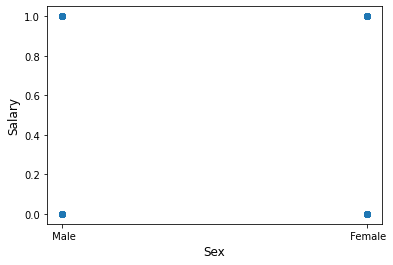

In [65]:
#Draw scatter plot for male/female >50K salary.

plt.scatter(new_df.sex, (new_df.salary == ' >50K'))
plt.xlabel('Sex' , fontSize = 12)
plt.ylabel('Salary' , fontSize = 12)
plt.show()

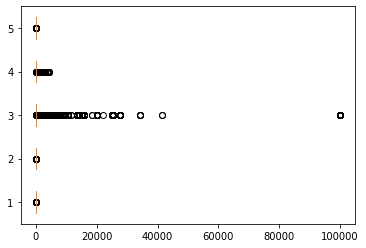

In [66]:
#Draw box plot to find out five stats of data.

box_1 = forPlotting['age']
box_2 = forPlotting['educationNum']
box_3 = forPlotting['capitalGain']
box_4 = forPlotting['capitalLoss']
box_5 = forPlotting['hoursPerWeek']

data = [box_1, box_2, box_3, box_4, box_5]
plt.boxplot(data, vert = 0)
plt.show()

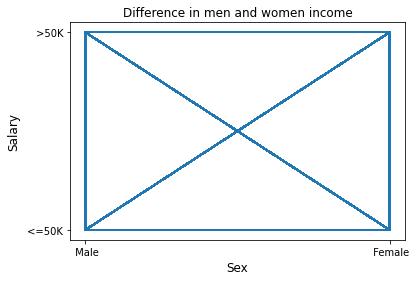

In [67]:
#Observe the difference of men and women incomes using line graph.

plt.plot(new_df.sex, new_df.salary)
plt.xlabel('Sex', fontSize = 12)
plt.ylabel('Salary', fontSize = 12)
plt.title("Difference in men and women income")
plt.show()

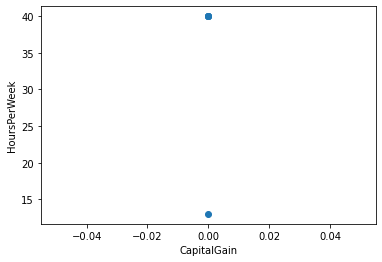

In [68]:
plt.scatter(forPlotting.capitalGain.head(), forPlotting.hoursPerWeek.head()) 
plt.xlabel("CapitalGain") 
plt.ylabel("HoursPerWeek") 
plt.show() 

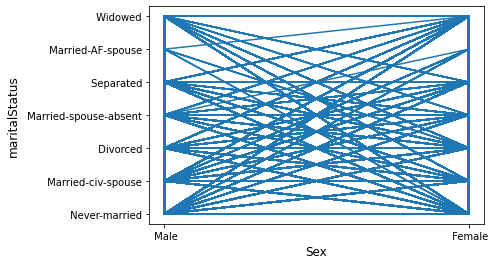

In [69]:
plt.plot(new_df.sex, new_df.maritalStatus)
plt.xlabel('Sex' , fontSize = 12)
plt.ylabel('maritalStatus' , fontSize = 12)
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y, hue. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


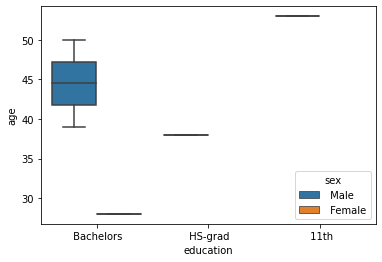

In [70]:
import seaborn as sns
sns.boxplot(new_df.education.head(), new_df.age.head(), new_df.sex.head(), data = df)

In [71]:
#Now, our dataset is completely ready for machine learning part (next part).